<h1 align="center">  Project : Prediction Of Building Accidents During The Insurance Period </h2>  
<h6 align="right" >  Mohamed Amine Lahyani </h6>
</br>

## Importing libraries

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

import warnings 
warnings.filterwarnings("ignore")

### Reading *train_Insurance.csv* & *test_Insurance.csv* files

In [2]:
train = pd.read_csv("train_Insurance.csv")
test = pd.read_csv("test_Insurance.csv")

In [3]:
print(train.shape)
print(test.shape)

(5012, 13)
(2147, 13)


In [4]:
files = ['train_Insurance.csv', 'test_Insurance.csv']
df = pd.DataFrame()
for file in files:
    data = pd.read_csv(file)
    df = pd.concat([df, data], axis=0)
df.to_csv('merged_files.csv', index=False)

In [5]:
data=pd.read_csv("merged_files.csv")

# I. Data preprocessing

In [6]:
data.head(5)

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,H13501,2012,1.0,1,N,V,V,U,1240.0,Wood-framed,without,75117,non
1,H14962,2012,1.0,0,N,V,V,U,900.0,Non-combustible,without,62916,non
2,H17755,2013,1.0,1,V,N,O,R,4984.0,Non-combustible,4,31149,oui
3,H13369,2016,0.5,0,N,V,V,U,600.0,Wood-framed,without,6012,oui
4,H12988,2012,1.0,0,N,V,V,U,900.0,Non-combustible,without,57631,non


In [7]:
test.head(5)

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,H3733,2013,1.0,0,V,V,V,U,3760.0,Fire-resistive,without,43157,oui
1,H16909,2015,1.0,0,V,N,O,R,1452.0,Fire-resistive,5,58194,non
2,H16867,2013,1.0,1,V,N,O,R,1944.0,Ordinary,6,92050,oui
3,H14813,2015,1.0,0,N,V,V,U,2270.0,Non-combustible,without,13209,oui
4,H3728,2016,0.5,0,V,N,O,R,2976.0,Fire-resistive,9,5177,non


In [8]:
data.isnull().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  7
Settlement              0
Building Dimension    106
Building_Type           0
NumberOfWindows         0
Geo_Code              102
Claim                   0
dtype: int64

In [9]:
data.dtypes

Customer Id            object
YearOfObservation       int64
Insured_Period        float64
Residential             int64
Building_Painted       object
Building_Fenced        object
Garden                 object
Settlement             object
Building Dimension    float64
Building_Type          object
NumberOfWindows        object
Geo_Code               object
Claim                  object
dtype: object

## Handling missing data from the Garden column

In [10]:
for i in range(len(data)) : 
    if (data["Garden"][i] not in ["V","O"]):
        print(data["Building Dimension"][i])

6203.0
760.0
350.0
3900.0
3900.0
350.0
8350.0


In [11]:
data["Garden"].value_counts()

Garden
O    3602
V    3550
Name: count, dtype: int64

### Processing the row with surface = 6203

In [12]:
nbr_build_with_gar = 0
nbr_build_without_gar = 0

for i in range(len(data)) : 
    if data["Garden"][i] in ["V"] and (data["Building Dimension"][i]>6000):
        nbr_build_with_gar = nbr_build_with_gar+1
    elif data["Garden"][i] in ["O"] and (data["Building Dimension"][i]>6000):
        nbr_build_without_gar = nbr_build_without_gar+1
print("Le nombre de batiments dont la surface est supérieur à 6000 et possèdent un jardin : ", nbr_build_with_gar)
print("Le nombre de batiments dont la surface est supérieur à 6000 et ne possèdent pas un jardin : ", nbr_build_without_gar)

Le nombre de batiments dont la surface est supérieur à 6000 et possèdent un jardin :  115
Le nombre de batiments dont la surface est supérieur à 6000 et ne possèdent pas un jardin :  246


    => Donc le batiment dont la surface est égale à 6203 a plus de probabilité de ne pas avoir un jardin

In [13]:
for i in range(len(data)) : 
    if data["Garden"][i] not in ["V","O"] and (data["Building Dimension"][i]>6000):
        data["Garden"][i]="O"

In [14]:
data["Garden"].isnull().sum()

5

### Processing the row with area = 3900

In [15]:
nbr_build_with_gar = 0
nbr_build_without_gar = 0

for i in range(len(data)) : 
    if data["Garden"][i]  in ["V"] and (4200>data["Building Dimension"][i]>3600):
        nbr_build_with_gar = nbr_build_with_gar + 1
    elif data["Garden"][i] in ["O"] and (4200>data["Building Dimension"][i]>3600):
        nbr_build_without_gar = nbr_build_without_gar + 1
print("Le nombre de batiments dont la surface est entre à 3600 et 4200 et possèdent un jardin : ", nbr_build_with_gar)
print("Le nombre de batiments dont la surface est entre à 3600 et 4200 et ne possèdent pas un jardin : ", nbr_build_without_gar)

Le nombre de batiments dont la surface est entre à 3600 et 4200 et possèdent un jardin :  80
Le nombre de batiments dont la surface est entre à 3600 et 4200 et ne possèdent pas un jardin :  146


    => Donc le batiment dont la surface est égale à 3900 a plus de probabilité de ne pas avoir un jardin

In [16]:
for i in range(len(data)) : 
    if data["Garden"][i] not in ["V","O"] and (4200>data["Building Dimension"][i]>3600):
        data["Garden"][i]="O"

In [17]:
data["Garden"].isnull().sum()

3

### Processing of two rows with an area equal to 350 and 760

In [18]:
nbr_build_with_gar = 0
nbr_build_without_gar = 0

for i in range(len(data)) : 
    if data["Garden"][i]  in ["V"] and (200<data["Building Dimension"][i]<900):
        nbr_build_with_gar = nbr_build_with_gar + 1
    elif data["Garden"][i] in ["O"] and (200<data["Building Dimension"][i]<900):
        nbr_build_without_gar = nbr_build_without_gar + 1
print("Le nombre de batiments dont la surface est entre à 200 et 900 et possèdent un jardin : ", nbr_build_with_gar)
print("Le nombre de batiments dont la surface est entre à 200 et 900 et ne possèdent pas un jardin : ", nbr_build_without_gar)

Le nombre de batiments dont la surface est entre à 200 et 900 et possèdent un jardin :  1513
Le nombre de batiments dont la surface est entre à 200 et 900 et ne possèdent pas un jardin :  1285


    => Donc les batiment dont la surface est entre 200 et 900 ont plus de probabilité d'avoir un jardin

In [19]:
for i in range(len(data)) : 
    if data["Garden"][i] not in ["V","O"] and (200<data["Building Dimension"][i]<900):
        data["Garden"][i]="V"

In [20]:
data["Garden"].isnull().sum()

0

## Handling missing data from the Geo_Code column :

In [21]:
data.isnull().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  0
Settlement              0
Building Dimension    106
Building_Type           0
NumberOfWindows         0
Geo_Code              102
Claim                   0
dtype: int64

In [22]:
data["Geo_Code"].value_counts()

Geo_Code
6088     143
33063    137
6083     113
13206     98
31555     87
        ... 
6044       1
78638      1
66171      1
73006      1
69027      1
Name: count, Length: 1307, dtype: int64

In [23]:
data["Settlement"].value_counts()

Settlement
R    3610
U    3549
Name: count, dtype: int64

In [24]:
l=[]
for i in range(len(data)): 
    if (data["Geo_Code"][i] in ["6088"]) and (data["Settlement"][i] not in l) :
        l.append(data["Settlement"][i])
        

In [25]:
l

['R', 'U']

In [26]:
data1 = data.drop('Geo_Code', axis=1)

## Handling missing data from the Building Dimension column :

In [27]:
data1.isnull().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  0
Settlement              0
Building Dimension    106
Building_Type           0
NumberOfWindows         0
Claim                   0
dtype: int64

In [28]:
data1["Building Dimension"].value_counts()

Building Dimension
400.0     150
500.0     120
300.0     118
450.0     117
600.0     114
         ... 
1815.0      1
5912.0      1
431.0       1
5939.0      1
862.0       1
Name: count, Length: 2043, dtype: int64

In [29]:
import statistics
import math

l1=[]
l2=[]
m1=0
m2=0

for i in range(len(data1)) : 
    if(not math.isnan(data1["Building Dimension"][i])) :
        if (data1["Residential"][i]==1):
            l1.append(data1["Building Dimension"][i])
        elif (data1["Residential"][i]==0):
            l2.append(data1["Building Dimension"][i])

m1 = np.mean(l1)
m2 = np.mean(l2)
print("La moyenne des surface des batiments présents dans une résidence", m1)
print("La moyenne des surface des batiments présents hors d'une résidence", m2)


La moyenne des surface des batiments présents dans une résidence 2081.5504885993487
La moyenne des surface des batiments présents hors d'une résidence 1797.0652528548123


In [30]:
for i in range(len(data1)) : 
    if(math.isnan(data1["Building Dimension"][i])) :
        if (data1["Residential"][i]==1):
            data1["Building Dimension"][i]=m1
        elif (data1["Residential"][i]==0):
            data1["Building Dimension"][i]=m2
        

In [31]:
data1.isnull().sum()

Customer Id           0
YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
NumberOfWindows       0
Claim                 0
dtype: int64

### Data encoding

In [32]:
data1["NumberOfWindows"].value_counts()

NumberOfWindows
without    3550
4           939
3           844
5           639
2           363
6           306
7           211
8           116
1            75
>=10         67
9            49
Name: count, dtype: int64

In [33]:
data1['NumberOfWindows'].replace(["without"],[0], inplace=True)

In [34]:
data1["NumberOfWindows"].value_counts()

NumberOfWindows
0       3550
4        939
3        844
5        639
2        363
6        306
7        211
8        116
1         75
>=10      67
9         49
Name: count, dtype: int64

In [35]:
data1['NumberOfWindows'].replace([">=10"],[10], inplace=True)

In [36]:
data1["NumberOfWindows"].value_counts()

NumberOfWindows
0     3550
4      939
3      844
5      639
2      363
6      306
7      211
8      116
1       75
10      67
9       49
Name: count, dtype: int64

In [37]:
data1["Claim"].value_counts()

Claim
non    5525
oui    1634
Name: count, dtype: int64

In [38]:
data1['Claim'].replace(["non","oui"],[0,1], inplace=True)

In [39]:
data1["Claim"].value_counts()

Claim
0    5525
1    1634
Name: count, dtype: int64

In [40]:
Encoder=LabelEncoder()
data1['Building_Type']=Encoder.fit_transform(data1['Building_Type'])
data1['Settlement']=Encoder.fit_transform(data1['Settlement'])
data1['Garden']=Encoder.fit_transform(data1['Garden'])
data1['Building_Fenced']=Encoder.fit_transform(data1['Building_Fenced'])
data1['Building_Painted']=Encoder.fit_transform(data1['Building_Painted'])

data1.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Claim
0,H13501,2012,1.0,1,0,1,1,1,1240.0,3,0,0
1,H14962,2012,1.0,0,0,1,1,1,900.0,1,0,0
2,H17755,2013,1.0,1,1,0,0,0,4984.0,1,4,1
3,H13369,2016,0.5,0,0,1,1,1,600.0,3,0,1
4,H12988,2012,1.0,0,0,1,1,1,900.0,1,0,0


In [41]:
final_data=data1.drop('Customer Id', axis=1)

In [42]:
final_data.head()

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Claim
0,2012,1.0,1,0,1,1,1,1240.0,3,0,0
1,2012,1.0,0,0,1,1,1,900.0,1,0,0
2,2013,1.0,1,1,0,0,0,4984.0,1,4,1
3,2016,0.5,0,0,1,1,1,600.0,3,0,1
4,2012,1.0,0,0,1,1,1,900.0,1,0,0


In [43]:
final_data.shape

(7159, 11)

# II. Machine learning: building models

In [44]:
train, test = train_test_split(final_data, test_size=0.2999)

In [45]:
print(train.shape)
print(test.shape)

(5012, 11)
(2147, 11)


In [46]:
y_train=train["Claim"]
y_test=test["Claim"]

In [47]:
x_train=train[["YearOfObservation","Insured_Period","Residential","Building_Painted","Building_Fenced","Garden","Settlement","Building Dimension","Building_Type","NumberOfWindows"]]
x_test=test[["YearOfObservation","Insured_Period","Residential","Building_Painted","Building_Fenced","Garden","Settlement","Building Dimension","Building_Type","NumberOfWindows"]]

In [48]:
print(x_train.shape)
print(x_test.shape)

(5012, 10)
(2147, 10)


### Decision tree

In [49]:
Arbre=DecisionTreeClassifier(random_state=25, max_depth=5)
Arbre.fit(x_train,y_train,sample_weight=None,check_input=True)


DecisionTreeClassifier(max_depth=5, random_state=25)

### Logistic regression

In [69]:
LR = LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

### Random Forest Classifier

In [82]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

### MLP Classifier

In [83]:
mlp = MLPClassifier()
mlp.fit(x_train, y_train)

MLPClassifier()

---

# III. Validation & Interpretation

### Decision tree

In [58]:
Arbre.score(x_test,y_test)

0.7806241266884024

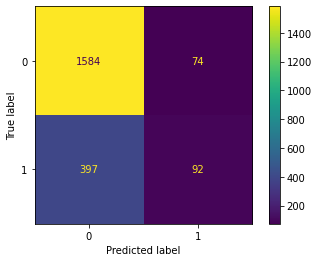

In [60]:
plot_confusion_matrix(Arbre, x_test, y_test)
plt.show()

In [84]:
print(classification_report(y_test,Arbre.predict(x_test)))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87      1658
           1       0.55      0.19      0.28       489

    accuracy                           0.78      2147
   macro avg       0.68      0.57      0.58      2147
weighted avg       0.74      0.78      0.74      2147



### Logistic regression

In [64]:
LR.score(x_test,y_test)

0.7862133209129017

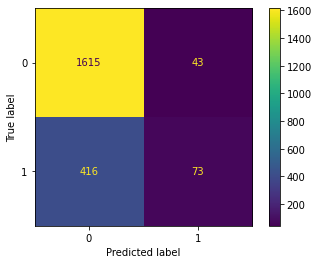

In [86]:
plot_confusion_matrix(LR, x_test, y_test)
plt.show()

### Random Forest Classifier

In [85]:
rf.score(x_test,y_test)

0.7317186772240335

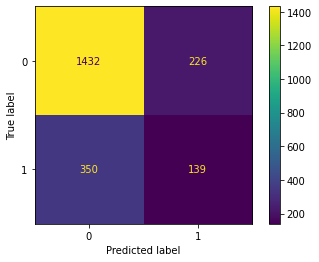

In [78]:
plot_confusion_matrix(rf, x_test, y_test)
plt.show()

In [89]:
print(classification_report(y_test,rf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83      1658
           1       0.38      0.28      0.32       489

    accuracy                           0.73      2147
   macro avg       0.59      0.57      0.58      2147
weighted avg       0.71      0.73      0.72      2147



### MLP Classifier 

In [90]:
mlp.score(x_test,y_test)

0.7233348858872846

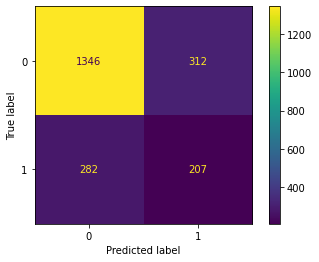

In [91]:
plot_confusion_matrix(mlp, x_test, y_test)
plt.show()

In [88]:
print(classification_report(y_test,mlp.predict(x_test)))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1658
           1       0.40      0.42      0.41       489

    accuracy                           0.72      2147
   macro avg       0.61      0.62      0.61      2147
weighted avg       0.73      0.72      0.73      2147



---